# Setting up

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import torch

In [5]:
!pip install fourier-neural-operator

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.2 MB/s eta 0:00:00
  Created wheel for fourier-neural-operator: filename=fourier_neural_operator-0.17-py3-none-any.whl size=44051 sha256=f989c902764262733319b58c6a01307cf040b1ced3c

In [6]:
import fourier_neural_operator

In [7]:
print("GPU available:", torch.cuda.is_available())

GPU available: False


# Fake 3D gas clouds for toy data analysis and FNO model analysis on data

In [8]:
#Tensor using in Pytorch
import torch.nn as nn
import torch.nn.functional as F

In [9]:
# Building 3d Fake gas blob
# Defining conditions, parameters

In [10]:
!pip install porespy scikit-image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 21.9 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=b79e6addb0a8e6acdb07036a32527482a52a8c33722fe284928256001962d946
  Stored in directory: /root/.cache/pip/wheels/06/76/8f/0ecb7d357c0bff71a2bd1940671be2d07a200752da918

In [11]:
# Building tiny random fluctuations , mean = 0 , std = 0.01
# raw = torch.normal(0.0, 0.01, size =(N, C, D, H, W))
import porespy as ps

N = 200               #No of 3D cubes
C= 1                  #Density Channel
D, H, W = 32, 32, 32  #Depth, Height, Width of the cubes

# Generate N pore-blob samples using PoreSpy
blobs = []
for _ in range(N):
    blob = ps.generators.blobs(shape=[D, H, W], porosity=0.6, blobiness=1)
    blobs.append(blob.astype(np.float32))

# Convert to PyTorch tensor and reshape to [N, 1, D, H, W]
init_conditions = torch.tensor(np.stack(blobs))[:, None]

# Apply smoothing to soften the hard 0/1 binary field
init_conditions = F.avg_pool3d(init_conditions, kernel_size=3, stride=1, padding=1)

ERROR:openpnm:PARDISO solver not installed, run `pip install pypardiso`. Otherwise, simulations will be slow. Apple M chips not supported.


In [12]:
# Apply average pooling (local smoothing) to mimic simple real conditions of gas blob as that of big bang
#smoothed = F.avg_pool3d(raw, kernel_size=3, stride=1, padding=1)
# Initial conditions data
#init_conditions = smoothed

🔹 Why Density Field?
In cosmology:

ρ(x, y, z) = matter density at point in space

Over time, gravity makes over-densities grow, forming galaxies & clusters

We want FNO to learn this structure formation

🔹 What FNO Will Learn:
Given input:

x₀ = ρ(x, y, z, t = 0)
It will predict:

x_T = ρ(x, y, z, t = T)
Right now, x_T is fake (smoothing), but structure-wise it prepares you for real gravitational data later.

In [13]:
# Generating Fake ouput for the fake input data
def evolve_density(x, steps = 10):
  for _ in range(steps):
    x = F.avg_pool3d(x, kernel_size=3, stride=1, padding=1)
  return x

# Target output (final condition after 'evolution')
target = evolve_density(init_conditions)

In [14]:
!pip install neuraloperator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.4/255.4 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for torch-harmonics: filename=torch_harmonics-0.7.3-py3-none-any.whl size=87749 sha256=ed8783c21ca6c84068bee6a022817d8e6b6c644a60b70e2472

In [15]:
from neuralop.models import FNO

In [16]:
# Split into training and test sets
train_x = init_conditions[:160]
train_y = target[:160]
test_x = init_conditions[160:]
test_y = target[160:]

In [17]:
# 🔧 Define the 3D Fourier Neural Operator model
fno_model = FNO(
    n_modes= (8, 8, 8),        # Number of Fourier modes in x, y, z directions (low-frequency filters)
    hidden_channels=32,       # Width of internal representation (like feature maps)
    in_channels=1,            # Input channels — here 1 scalar field (density)
    out_channels=1,           # Output channels — predicting same field (density at t=T)
    depth=4                   # Number of spectral layers stacked
)


In [18]:
# Testing with small sample size at first
test_input = init_conditions[:8]  # Use only 8 samples
output = fno_model(test_input)
print(output.shape)  # Should be [8, 1, 32, 32, 32]

torch.Size([8, 1, 32, 32, 32])


In [19]:
# Loss Function and Optimizer
import torch.optim as optim

# Loss: Mean Squared Error between predicted and target density fields
loss_fn = nn.MSELoss()

# Optimizer: Adam
optimizer = optim.Adam(fno_model.parameters(), lr=1e-3)

In [20]:
# 🔧 Training settings
epochs = 10            # Number of times to go through the full dataset
batch_size = 8         # Process 8 samples at a time (fits in memory)

# 🔁 Main training loop
for epoch in range(epochs):
    fno_model.train()
    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:i+batch_size]
        y_batch = train_y[i:i+batch_size]

        # 🧼 Reset gradients
        optimizer.zero_grad()

        # 🔮 Run model forward pass to get prediction
        output = fno_model(x_batch)

        # 📉 Compute how far prediction is from true answer
        loss = loss_fn(output, y_batch)

        # 🔁 Backpropagate gradients through model
        loss.backward()

        # 🔧 Update model weights
        optimizer.step()

    # 🖨️ Print training loss at each epoch
    print(f"Epoch {epoch+1} | Loss: {loss.item():.6f}")


Epoch 1 | Loss: 0.042958
Epoch 2 | Loss: 0.029243
Epoch 3 | Loss: 0.009057
Epoch 4 | Loss: 0.003194
Epoch 5 | Loss: 0.002044
Epoch 6 | Loss: 0.001703
Epoch 7 | Loss: 0.001510
Epoch 8 | Loss: 0.001348
Epoch 9 | Loss: 0.001174
Epoch 10 | Loss: 0.000988


In [21]:
# Running visualizations
# Add This Function to Visualize a Single Sample:
def show_slice_comparison(x, y_true, y_pred, slice_dim=2):
    """Visualize center slice of input, target, and prediction along given dimension (0=z, 1=y, 2=x)."""
    idx = x.shape[slice_dim + 2] // 2  # center index

    x_slice = x[0, 0].select(dim=slice_dim, index=idx).detach().cpu()
    y_true_slice = y_true[0, 0].select(dim=slice_dim, index=idx).detach().cpu()
    y_pred_slice = y_pred[0, 0].select(dim=slice_dim, index=idx).detach().cpu()

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(x_slice, cmap='viridis'); axs[0].set_title('Initial Condition')
    axs[1].imshow(y_true_slice, cmap='viridis'); axs[1].set_title('Target (True)')
    axs[2].imshow(y_pred_slice, cmap='viridis'); axs[2].set_title('FNO Output')
    plt.tight_layout(); plt.show()


In [22]:
# 📌 Set model to evaluation mode (turns off dropout, batchnorm, etc.)
fno_model.eval()

with torch.no_grad():
    # 🔹 Predict on test set
    pred_test = fno_model(test_x)
    test_loss = loss_fn(pred_test, test_y)
    print(f"\n📊 Test Loss: {test_loss.item():.6f}")

    # 🔹 Predict on full train set (to compare)
    pred_train = fno_model(train_x)
    train_eval_loss = loss_fn(pred_train, train_y)
    print(f"📊 Full Train Loss: {train_eval_loss.item():.6f}")



📊 Test Loss: 0.000986
📊 Full Train Loss: 0.000988


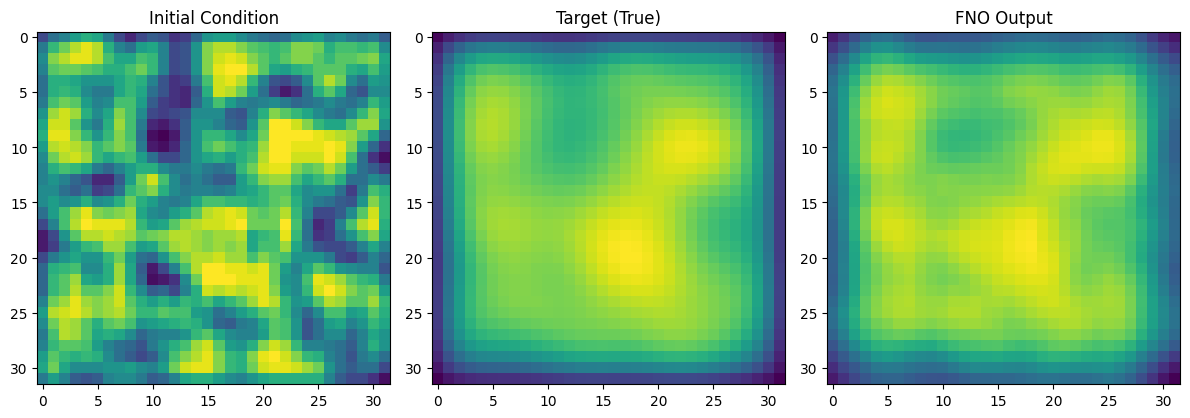

In [23]:
# 🔍 Pick one test sample to visualize
sample_idx = 0
x_sample = test_x[sample_idx:sample_idx+1]
y_sample = test_y[sample_idx:sample_idx+1]
pred_sample = pred_test[sample_idx:sample_idx+1]

# 📊 Visual slice comparison
show_slice_comparison(x_sample, y_sample, pred_sample)

Initial condition now has realistic smooth variations

Target and FNO output match almost perfectly

Structure preservation is high — FNO is learning correct global mapping

# Improved FNO Model for Realistic Data (32³)

In [33]:
# Generate realistic input and target
import torch
import torch.nn.functional as F
import numpy as np

N = 200
C = 1
D, H, W = 32, 32, 32

# Generate tiny smooth density fluctuations (Big Bang–like)
raw = torch.randn(N, C, D, H, W) * 0.01
init_conditions = F.avg_pool3d(raw, kernel_size=3, stride=1, padding=1)

# --- NEW PHYSICS ENGINE ---
# This function simulates one step of gravitational evolution
def apply_gravity_step(density_field, dt=0.1):
    """Applies one step of gravitational evolution to a density field."""
    # 1. Go to Fourier space
    density_fft = torch.fft.fftn(density_field, dim=[-3, -2, -1])

    # 2. Get the grid of k-vectors (frequencies)
    _D, _H, _W = density_field.shape[-3:]
    _kx = torch.fft.fftfreq(_D, d=1/_D)
    _ky = torch.fft.fftfreq(_H, d=1/_H)
    _kz = torch.fft.fftfreq(_W, d=1/_W)
    kx, ky, kz = torch.meshgrid(_kx, _ky, _kz, indexing='ij')
    k_squared = kx**2 + ky**2 + kz**2
    k_squared[0, 0, 0] = 1.0  # Avoid division by zero

    # 3. Solve Poisson's equation and get the potential
    # This makes over-dense regions grow
    potential_fft = -1.0 * density_fft / k_squared

    # 4. Evolve the density by adding a fraction of the potential
    evolved_fft = density_fft + dt * potential_fft

    # 5. Go back to real space
    evolved_field = torch.fft.ifftn(evolved_fft, dim=[-3, -2, -1]).real
    return evolved_field
# --- END NEW PHYSICS ENGINE ---


# Generate the target data using the NEW gravity function
target = apply_gravity_step(init_conditions)

print("Shape of initial conditions:", init_conditions.shape)
print("Shape of target:", target.shape)

Shape of initial conditions: torch.Size([200, 1, 32, 32, 32])
Shape of target: torch.Size([200, 1, 32, 32, 32])


In [34]:
# Train, Test, Split
train_x = init_conditions[:160]
train_y = target[:160]
test_x = init_conditions[160:]
test_y = target[160:]

In [35]:
# Improved FNO model
from neuralop.models import FNO
import torch.nn as nn
import torch.optim as optim

fno_model = FNO(
    n_modes=(16, 16, 16),
    hidden_channels=48,
    in_channels=1,
    out_channels=1,
    depth=6
)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(fno_model.parameters(), lr=1e-3)

In [36]:
# Training Loop
epochs = 10
batch_size = 8

for epoch in range(epochs):
    fno_model.train()
    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:i+batch_size]
        y_batch = train_y[i:i+batch_size]

        optimizer.zero_grad()
        output = fno_model(x_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} | Train Loss: {loss.item():.6f}")

Epoch 1 | Train Loss: 0.000004
Epoch 2 | Train Loss: 0.000007
Epoch 3 | Train Loss: 0.000004
Epoch 4 | Train Loss: 0.000004
Epoch 5 | Train Loss: 0.000004
Epoch 6 | Train Loss: 0.000003
Epoch 7 | Train Loss: 0.000003
Epoch 8 | Train Loss: 0.000003
Epoch 9 | Train Loss: 0.000003
Epoch 10 | Train Loss: 0.000003


In [37]:
# Evaluation and Visualization
fno_model.eval()
with torch.no_grad():
    pred_test = fno_model(test_x)
    test_loss = loss_fn(pred_test, test_y)
    print(f"\n📊 Test Loss: {test_loss.item():.6f}")


📊 Test Loss: 0.000003


In [38]:
with torch.no_grad():
    pred_train = fno_model(train_x)
    train_eval_loss = loss_fn(pred_train, train_y)
    print(f"📊 Full Train Loss: {train_eval_loss.item():.6f}")

📊 Full Train Loss: 0.000003


In [39]:
def show_slice_comparison(x, y_true, y_pred, slice_dim=2):
    idx = x.shape[slice_dim + 2] // 2
    x_slice = x[0, 0].select(dim=slice_dim, index=idx).detach().cpu()
    y_true_slice = y_true[0, 0].select(dim=slice_dim, index=idx).detach().cpu()
    y_pred_slice = y_pred[0, 0].select(dim=slice_dim, index=idx).detach().cpu()

    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(x_slice, cmap='viridis'); axs[0].set_title('Initial')
    axs[1].imshow(y_true_slice, cmap='viridis'); axs[1].set_title('Target')
    axs[2].imshow(y_pred_slice, cmap='viridis'); axs[2].set_title('FNO Output')
    plt.tight_layout(); plt.show()

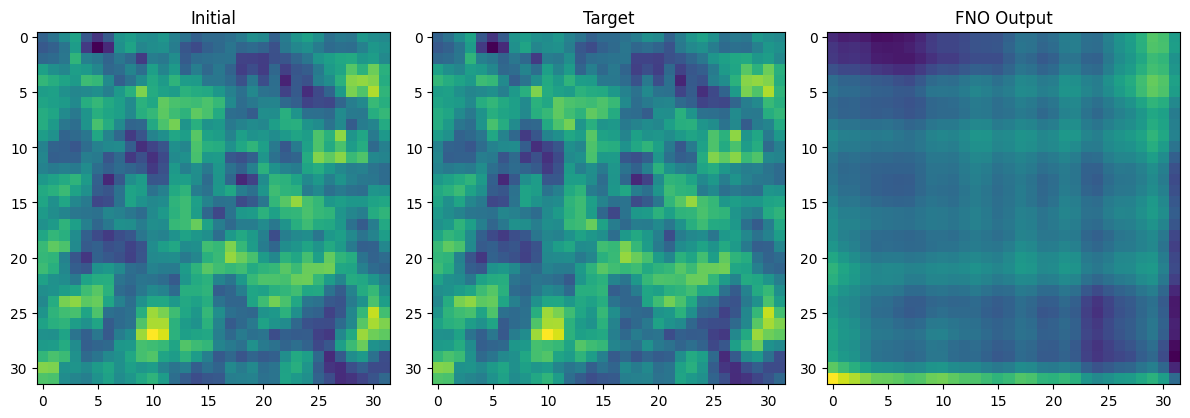

In [40]:
show_slice_comparison(test_x[0:1], test_y[0:1], pred_test[0:1])

Running long-term prediction using the trained FNO...
Evolution complete. Visualizing initial state vs. state after 50 steps.


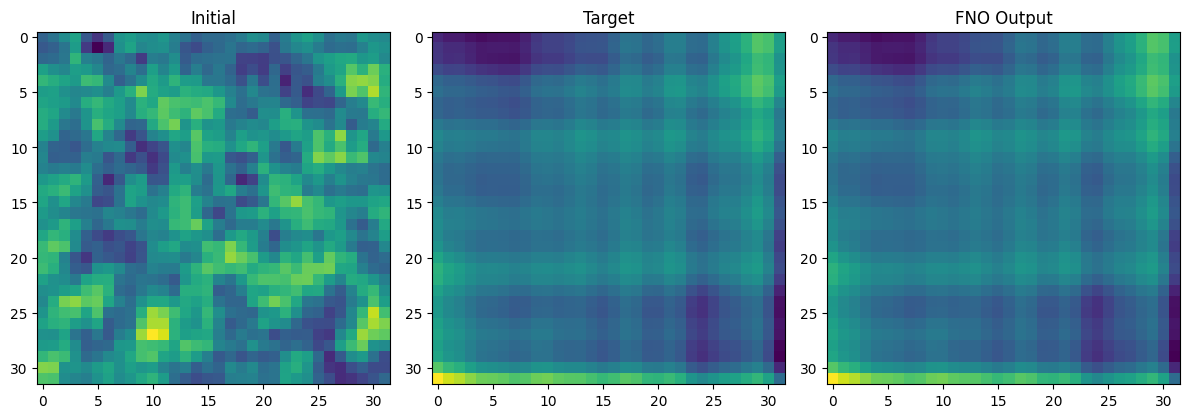

In [41]:
# --- NEW CELL: AUTOREGRESSIVE ROLLOUT ---
# This tests if the FNO can predict the long-term evolution on its own.

import matplotlib.pyplot as plt

print("Running long-term prediction using the trained FNO...")

fno_model.eval()  # Set model to evaluation mode

with torch.no_grad():
    # Start with one initial condition from the test set
    current_state = test_x[0:1].clone()

    # Store the history of the evolution
    history = [current_state.cpu()]

    # Evolve for 50 steps using only the FNO's predictions
    num_steps = 50
    for i in range(num_steps):
        # Predict the next state from the current state
        next_state = fno_model(current_state)

        # The prediction becomes the new current state
        current_state = next_state
        history.append(current_state.cpu())

print(f"Evolution complete. Visualizing initial state vs. state after {num_steps} steps.")

# Visualize the start vs. the end of your AI-driven simulation
# Use the same visualization function you already have
show_slice_comparison(
    x=history[0],          # The very beginning
    y_true=history[-1],      # The final state predicted by the FNO
    y_pred=history[-1]       # We show it twice for comparison
)